# Case Study on Measures of Central Tendency and Dispersion

### Problem Statement:
    
An Institution wishes to find out their student’s ability in maths, reading and
writing skills.<br>
The Institution wants to do an exploratory study to check the
following information.

1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
    * Gender
    * Test preparation course
    
    
4. What do you think about the scoring variation for math, reading and writing based on
    * Gender
    * Test preparation course
    
    
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

Go to the link to get the dataset https://drive.google.com/file/d/1o4Lgrv2l_m4ft-w4Sa9Xq6Gmqvv-W_kp/view?usp=sharing

### Importing the Dependancies and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r'C:\Users\Aswathi\Downloads\Week 6\Week6 - Central Tendency Assignment\StudentsPerformance.csv')

**Familiarizing the Dataset and Inspecting High Level Stats**

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### Q1. Find out how many males and females participated in the test.

In [6]:
gender = df['gender'].value_counts()
print("{} female students participated in the test.\n".format(gender[0]))
print("{} male students participated in the test.".format(gender[1]))

518 female students participated in the test.

482 male students participated in the test.


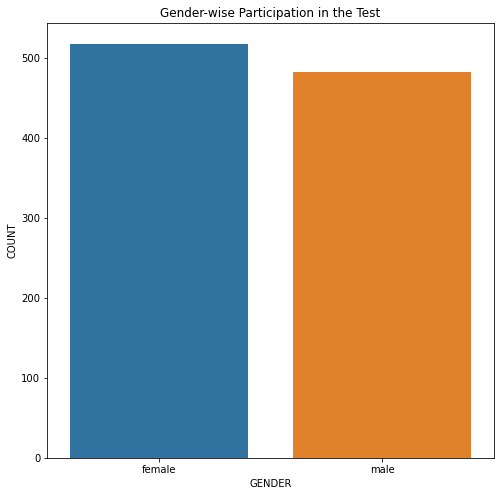

In [7]:
#figure showing the male and female participation in test 

plt.figure(figsize = (8,8))
sns.countplot(data = df,x = 'gender')
plt.title("Gender-wise Participation in the Test")
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()

**Findings:**
1. Around 52% of the participants are Female and 48% are Male Students.
2. The Dataset is nearly balanced.

### Q2. What do you think about the students' parental level of education?

In [8]:
df['parental level of education'].value_counts().to_frame()

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


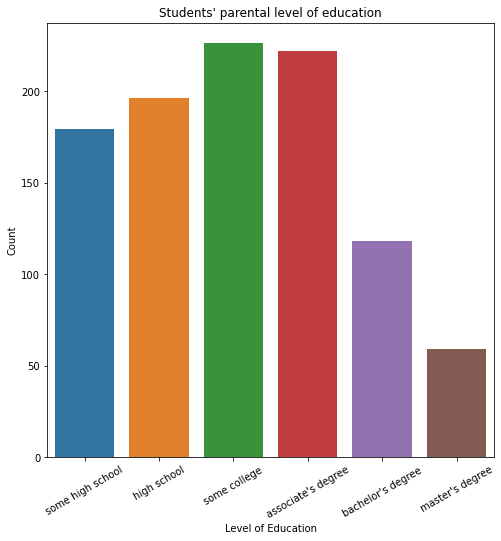

In [9]:
plt.figure(figsize = (8,8))
sns.countplot(data = df,x = 'parental level of education')
plt.title("Students' parental level of education")
plt.xlabel('Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

**Findings**
1. About 37.5% of the Parents have only School Education
2. 62.5% of the Parents have College Education
3. About 23% of the Parents have mere College Education, not precisely having a Bachelor's or Master's Degree.
4. Approximaltely, 22% of the Parents have an Associate's Degree (equivalent to a 2-year Diploma)
5. Only about a tenth of the Parents have a Bachelor's Degree.
6. Master's Degree, being the highest level of education among the parents is seen only with a sparse 6% of the parents.

### Q3. Who scores the most on average for math, reading and writing based on
   * Gender
   * Test preparation course

**Gender-wise ranking for average scores in Math, Reading and Writing**

In [31]:
#Gender-wise calculation for male
df[(df['gender'] == 'male')].mean().to_frame()

,0
math score,68.821577
reading score,65.545643
writing score,63.446058


In [30]:
#Gender-wise calculation for female
df[(df['gender'] == 'female')].mean().to_frame()

,0
math score,63.376448
reading score,72.590734
writing score,72.467181


**Findings**
1. Male participants have scored a better average of 68.82 in Math Score. The average of Female participants is approximately 5.5 points short of Male average. 
2. Female participants exhibited a good average score of 72.59 in Reading Score and 72.46 in Writing Score. Male participants on average are short of 7 points in Reading Score and 9 points in Writing Score. 
3. A not very solid assumption that can be made from the mean scores is that Male participants tend to be better with Mathematics and Computations whereas Female participants are much skilled in Reading and Writing comprehensions. This however is not an assumption of clarity or generalization. 

**Test Preparation Course status-based ranking for average scores in Math, Reading and Writing**

In [22]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

* We see that 'test preparation course' can have two object values: 'None' and 'Completed'.

In [28]:
#Test Prep Course status = 'none' based calculation of Average

df[(df['test preparation course'] == 'none')].mean().to_frame()

,0
math score,63.789720
reading score,66.417445
writing score,64.457944


In [29]:
#Test Prep Course status = 'completed' based calculation of Average

df[(df['test preparation course'] == 'completed')].mean().to_frame()

,0
math score,69.966480
reading score,74.175978
writing score,74.684358


**Findings**
1. In all the tests, on average, the Participants who have completed the 'Test Prep Course' have performed distinctly well than participants who haven't attended or completed the prep course. This means that Practice and Preparation for the test impacts the performance of the candidate.
2. However, the average score for Math among the prep course completed participants tend to differ only by a score 6 from those who didnt. 
3. Reading and Writing score average of prep course completed participants on the other hand differ by a score of 8 and 10 respectively from those who didnt complete. 

**Basic Insights**
* In the general trend of the dataset, a Male participant who completed the test prep course would score better than a female candidate with same status of test prep course in Math test.
* Similarly, a Female participant who completed the test prep course would on score distinctly on an average than a male candidate in both Reading and Writing test with same status of prep course.


### Q4. What do you think about the scoring variation for math, reading and writing based on
* Gender
* Test preparation course

Inorder to check the scoring variation in the dataset, we will consider the folowing Measures of Variability in Statistics:
1. Range
2. Inter Quartile Range (IQR)
3. Variance
4. Standard Deviation

In [50]:
#copying the required columns to a new df
new_df = df[['gender','test preparation course','math score','writing score','reading score']]
new_df.head(3)

,gender,test preparation course,math score,writing score,reading score
0,female,none,0,10,17
1,female,none,8,23,24
2,female,none,18,28,32


## I. Gender-based Scoring Variability

### 1.A. Range for Female Participants

In [54]:
new_df[(new_df['gender'] == 'female')].max().to_frame()

,0
gender,female
test preparation course,none
math score,100
writing score,100
reading score,100


In [53]:
new_df[(new_df['gender'] == 'female')].min().to_frame()

,0
gender,female
test preparation course,completed
math score,0
writing score,10
reading score,17


From the Min and Max data of female participants, we see that:
* Max score for Math is 100 whereas Min score is 0
* Max score for Writing Test is 100 whereas Min score is 10
* Max score for Reading Test is 100 whereas Min score is 17

**Range for Female Participants' scoring in Math Test**

In [55]:
frange_math = 100 - 0
print("Range for Math Score for Female Participants is {}".format(frange_math))

Range for Math Score for Female Participants is 100


**Range for Female Participants' scoring in Reading Test**

In [58]:
frange_read = 100 - 17
print("Range for Reading Score for Female Participants is {}".format(frange_read))

Range for Reading Score for Female Participants is 83


**Range for Female Participants' scoring in Writing Test**

In [57]:
frange_write = 100 - 10
print("Range for Writing Score for Female Participants is {}".format(frange_write))

Range for Writing Score for Female Participants is 90


### 1.B. Range for Male Participants

In [59]:
new_df[(new_df['gender'] == 'male')].max().to_frame()

,0
gender,male
test preparation course,none
math score,100
writing score,100
reading score,100


In [60]:
new_df[(new_df['gender'] == 'male')].min().to_frame()

,0
gender,male
test preparation course,completed
math score,27
writing score,15
reading score,23


From the Min and Max data of male participants, we see that:
* Max score for Math is 100 whereas Min score is 27
* Max score for Writing Test is 100 whereas Min score is 15
* Max score for Reading Test is 100 whereas Min score is 23

**Range for Female Participants' scoring in Math Test**

In [62]:
mrange_math = 100 - 27
print("Range for Math Test Score for Male Participants is {}".format(mrange_math))

Range for Math Test Score for Male Participants is 73


**Range for Male Participants' scoring in Reading Test**

In [63]:
mrange_read = 100 - 15
print("Range for Reading Score for Male Participants is {}".format(mrange_read))

Range for Reading Score for Male Participants is 85


**Range for Male Participants' scoring in Writing Test**

In [64]:
mrange_write = 100 - 23
print("Range for Writing Score for Male Participants is {}".format(mrange_write))

Range for Writing Score for Male Participants is 77


**Findings**
1. Math score for Female participants lies in a range of 0 to 100 whereas Math score for Male participants falls in a range of 27 to 100.
2. Reading score for Female participants lies in a range of 17 to 100 whereas Reading score for Male participants falls in a range of 23 to 100.
3. Writing score for Female participants lies in a range of 10 to 100 whereas Math score for Male participants falls in a range of 15 to 100.

### 2.A. Inter Quartile Range for Female Participants

In [82]:
df_m = new_df[(new_df['gender'] == 'male')]
df_f = new_df[(new_df['gender'] == 'female')]

In [87]:
#IQR for math test for females 
q3, q1 = np.percentile(df_f['math score'], [75 ,25])
iqr1 = q3 - q1
print("IQR for female participants in Math Test is {}.".format(iqr1))

IQR for female participants in Math Test is 20.0.


In [88]:
#IQR for writing test for females 
q3, q1 = np.percentile(df_f['writing score'], [75 ,25])
iqr2 = q3 - q1
print("IQR for female participants in Writing Test is {}.".format(iqr2))

IQR for female participants in Writing Test is 18.0.


In [89]:
##IQR for reading test for females 
q3, q1 = np.percentile(df_f['reading score'], [75 ,25])
iqr3 = q3 - q1
print("IQR for female participants in Reading Test is {}.".format(iqr3))

IQR for female participants in Reading Test is 19.75.


### 2.B. Inter Quartile Range for Male Participants

In [90]:
#IQR for math test for males 
q3, q1 = np.percentile(df_m['math score'], [75 ,25])
iqr4 = q3 - q1
print("IQR for male participants in Math Test is {}.".format(iqr4))

IQR for female participants in Math Test is 20.0.


In [91]:
#IQR for writing test for males 
q3, q1 = np.percentile(df_m['writing score'], [75 ,25])
iqr5 = q3 - q1
print("IQR for male participants in Writing Test is {}.".format(iqr5))

IQR for male participants in Writing Test is 21.0.


In [92]:
#IQR for reading test for males 
q3, q1 = np.percentile(df_m['reading score'], [75 ,25])
iqr6 = q3 - q1
print("IQR for male participants in Reading Test is {}.".format(iqr6))

IQR for male participants in Reading Test is 20.0.


**Cross-checking the NumPy IQR results with Stats IQR results**

In [69]:
from scipy import stats

In [97]:
print("\n Math Male IQR",stats.iqr(df_m['math score']))
print("\n Writing Male IQR",stats.iqr(df_m['writing score']))
print("\n Reading Male IQR",stats.iqr(df_m['reading score']))
print("\n Math Female IQR",stats.iqr(df_f['math score']))
print("\n Writing Female IQR",stats.iqr(df_f['writing score']))
print("\n Reading Female IQR",stats.iqr(df_f['reading score']))


 Math Male IQR 20.0

 Writing Male IQR 21.0

 Reading Male IQR 20.0

 Math Female IQR 20.0

 Writing Female IQR 18.0

 Reading Female IQR 19.75


***We see that both the results coincide exactly.***

**Findings**

The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data. 
The Midspread (distribution of middle 50% values) lies between the 75th and 25th percentile in the IQR.
1. IQR for Math score is same for both Males and Females.
2. IQR for Writing Score is 21.0 for Males while females have 18.0 indicating a more consistent scoring.
3. IQR for Reading Score is 20.0 for Males and females have a close enough score of 19.75.


### 3.A. Variance for Female Participants

In [119]:
#Variance for math test for females 
var1 = np.var(df_f['math score'])
print("Variance for female participants in Math Test is {}.".format(round(var1,2)))

Variance for female participants in Math Test is 256.46.


In [121]:
#Variance for reading test for females 
var2 = np.var(df_f['reading score'])
print("Variance for female participants in Reading Test is {}.".format(round(var2,2)))

Variance for female participants in Reading Test is 207.28.


In [122]:
#Variance for writing test for females 
var3 = np.var(df_f['writing score'])
print("Variance for female participants in Writing Test is {}.".format(round(var3,2)))

Variance for female participants in Writing Test is 219.94.


### 3.B. Variance for Male Participants

In [123]:
#Variance for math test for males 
var4 = np.var(df_m['math score'])
print("Variance for male participants in Math Test is {}.".format(round(var4,2)))

Variance for male participants in Math Test is 211.45.


In [128]:
#Variance for reading test for males 
var5 = np.var(df_m['reading score'])
print("Variance for male participants in Reading Test is {}.".format(round(var5,2)))

Variance for male participants in Reading Test is 199.8.


In [125]:
#Variance for writing test for males 
var6 = np.var(df_m['writing score'])
print("Variance for male participants in Writing Test is {}.".format(round(var6,2)))

Variance for male participants in Writing Test is 201.99.


**Cross-checking the NumPy Variance results with Statistics Variance results**

In [ ]:
import statistics 

In [ ]:
statistics.variance(df_f['math score'], xbar=None)

In [126]:
print("\n Math Male Variance",statistics.variance(df_m['math score'], xbar=None))
print("\n Writing Male Variance",statistics.variance(df_m['writing score'], xbar=None))
print("\n Reading Male Variance",statistics.variance(df_m['reading score'], xbar=None))
print("\n Math Female Variance",statistics.variance(df_f['math score'], xbar=None))
print("\n Writing Female Variance",statistics.variance(df_f['writing score'], xbar=None))
print("\n Reading Female Variance",statistics.variance(df_f['reading score'], xbar=None))


 Math Male Variance 211.88909688494752

 Writing Male Variance 202.41392413799053

 Reading Male Variance 200.21101008445407

 Math Female Variance 256.9585931607208

 Writing Female Variance 220.3693270501781

 Reading Female Variance 207.67743814552324


***We see that both the results nearly coincide.***

**Findings**

Variance measures how far a data set is spread out. It is mathematically defined as the average of the squared differences from the mean.
1. Variance for Math score have a difference of about 45 between Male and Female. This shows that Female math score has a more significant variance.
2. Variance for Writing score have a difference of about 18 between Male and Female participants. 
3. Variance for Reading score have a difference of only about 7 between Male and Female. This is the least difference of variance between scores of Male and Female among all test scores implying more similar distribution.


### 4. Standard Deviation for Female and Male Participants

* The variance for a sample data set is equal to the square of standard deviation.
* Hence, we can use the above measures of variance to get the Standard Deviation.
* To confirm the values, we will use inbuilt Std Dev method as well.

In [130]:
import math

In [134]:
var_list = [var1,var2,var3,var4,var5,var6]
for i in range(0,6):
    print("Std Dev{} is {}.".format((i+1),math.sqrt(var_list[i])))

Std Dev1 is 16.014447667670723.
Std Dev2 is 14.397100973816274.
Std Dev3 is 14.830505845684568.
Std Dev4 is 14.541303000402047.
Std Dev5 is 14.134908367048565.
Std Dev6 is 14.212458557100154.


**Standard deviations inferred from the above code snippet:**

Std Dev for Math Score for Females is 16.014447667670723.

Std Dev for Reading Score for Females is 14.397100973816274.

Std Dev for Writing Score for Females is 14.830505845684568.

Std Dev for Math Score for Males is 14.541303000402047.

Std Dev for Reading Score for Males is 14.134908367048565.

Std Dev for Writing Score for Males is 14.212458557100154.

**Cross-checking the Standard Deviation results with Pandas Inbuilt Std Dev results**

In [139]:
print("\n Math Male SD",df_m['math score'].std())
print("\n Writing Male SD",df_m['writing score'].std())
print("\n Reading Male SD",df_m['reading score'].std())
print("\n Math Female SD",df_f['math score'].std())
print("\n Writing Female SD",df_f['writing score'].std())
print("\n Reading Female SD",df_f['reading score'].std())


 Math Male SD 14.556410851750082

 Writing Male SD 14.227224751791567

 Reading Male SD 14.149593990092217

 Math Female SD 16.029928046024416

 Writing Female SD 14.844841765750752

 Reading Female SD 14.411017942724348


***We see that both the results nearly coincide.***

**Findings**

The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean.

1. We see that the Standard Deviation values for all the tests for Males lie inside 14 to 15 range.
2. The values of Standard Deviation for Females lie inside 14 to 15 range for Writing and Reading Tests but for Math Scores, Females have a standard deviation of 16, indicating a higher dispersion.


## II. Test Prep Course status-based Scoring Variability

In [140]:
new_df.head(3)

,gender,test preparation course,math score,writing score,reading score
0,female,none,0,10,17
1,female,none,8,23,24
2,female,none,18,28,32


### 1.A. Range for 'Completed' Status

In [142]:
new_df[(new_df['test preparation course'] == 'completed')].max().to_frame()

,0
gender,male
test preparation course,completed
math score,100
writing score,100
reading score,100


In [143]:
new_df[(new_df['test preparation course'] == 'completed')].min().to_frame()

,0
gender,female
test preparation course,completed
math score,23
writing score,36
reading score,37


From the Min and Max data of participants with Completed status , we see that:
* Max score for Math is 100 whereas Min score is 23
* Max score for Writing Test is 100 whereas Min score is 36
* Max score for Reading Test is 100 whereas Min score is 37

**Range for Completed Participants' scoring in Tests:**

In [144]:
crange_math = 100 - 23
print("Range for Math Score for Test Prep Course Completed Participants is {}".format(crange_math))

Range for Math Score for Test Prep Course Completed Participants is 77


In [145]:
crange_writing = 100 - 36
print("Range for Writing Score for Test Prep Course Completed Participants is {}".format(crange_writing))

Range for Writing Score for Test Prep Course Completed Participants is 64


In [147]:
crange_reading = 100 - 37
print("Range for Reading Score for Test Prep Course Completed Participants is {}".format(crange_reading))

Range for Reading Score for Test Prep Course Completed Participants is 63


### 1.B. Range for 'None' Status

In [148]:
new_df[(new_df['test preparation course'] == 'none')].max().to_frame()

,0
gender,male
test preparation course,none
math score,100
writing score,100
reading score,100


In [150]:
new_df[(new_df['test preparation course'] == 'none')].min().to_frame()

,0
gender,female
test preparation course,none
math score,0
writing score,10
reading score,17


From the Min and Max data of participants with None status , we see that:
* Max score for Math is 100 whereas Min score is 0
* Max score for Writing Test is 100 whereas Min score is 10
* Max score for Reading Test is 100 whereas Min score is 17

**Range for None status Participants' scoring in Tests:**

In [154]:
nrange_math = 100 - 0
print("Range for Math Score for Test Prep None-status Participants is {}".format(nrange_math))

Range for Math Score for Test Prep None-status Participants is 100


In [153]:
nrange_reading = 100 - 10
print("Range for Reading Score for Test Prep None-status Participants is {}".format(nrange_reading))

Range for Reading Score for Test Prep None-status Participants is 90


In [152]:
nrange_writing = 100 - 17
print("Range for Math Score for Test Prep None-status Participants is {}".format(nrange_writing))

Range for Math Score for Test Prep None-status Participants is 83


**Findings**
1. Math score for participants who completed the course lies in a range of 23 to 100 whereas Math score for participants who didnt do the course falls in a range of 0 to 100.
2. In all the three tests, we see that some students scored 100 marks even without any prep course.
2. Reading score for participants who completed course lies in a range of 37 to 100 whereas Reading score for None-status participants falls in a range of 10 to 100.
3. Writing score for course completed participants lies in a range of 36 to 100 whereas Math score for None-status participants falls in a range of 17 to 100.

### 2.A. Inter Quartile Range for 'Completed' Participants

In [155]:
df_c = new_df[(new_df['test preparation course'] == 'completed')]
df_n = new_df[(new_df['test preparation course'] == 'none')]

In [156]:
#IQR for math test for completed 
q3, q1 = np.percentile(df_c['math score'], [75 ,25])
iqrange1 = q3 - q1
print("IQR for completed participants in Math Test is {}.".format(iqrange1))

IQR for completed participants in Math Test is 18.0.


In [157]:
#IQR for writing test for completed 
q3, q1 = np.percentile(df_c['writing score'], [75 ,25])
iqrange2 = q3 - q1
print("IQR for completed participants in Writing Test is {}.".format(iqrange2))

IQR for completed participants in Writing Test is 16.75.


In [158]:
#IQR for reading test for completed 
q3, q1 = np.percentile(df_c['reading score'], [75 ,25])
iqrange3 = q3 - q1
print("IQR for completed participants in Reading Test is {}.".format(iqrange3))

IQR for completed participants in Reading Test is 18.0.


### 2.B. Inter Quartile Range for 'None' Participants

In [159]:
#IQR for math test for none 
q3, q1 = np.percentile(df_n['math score'], [75 ,25])
iqrange4 = q3 - q1
print("IQR for None-status participants in Math Test is {}.".format(iqrange4))

IQR for None-status participants in Math Test is 20.0.


In [160]:
#IQR for writing test for none 
q3, q1 = np.percentile(df_n['writing score'], [75 ,25])
iqrange5 = q3 - q1
print("IQR for None-status participants in Writing Test is {}.".format(iqrange5))

IQR for None-status participants in Writing Test is 20.0.


In [161]:
#IQR for reading test for none 
q3, q1 = np.percentile(df_n['reading score'], [75 ,25])
iqrange6 = q3 - q1
print("IQR for None-status participants in Reading Test is {}.".format(iqrange6))

IQR for None-status participants in Reading Test is 19.0.


**Findings**

1. IQR for Math score is low for participants with Course Completed status than None status participants.
2. Scores are better for participants who had completed the course.

### 3.A. Variance for 'Completed' Participants

In [163]:
#Variance for math test for completed 
v1 = np.var(df_c['math score'])
print("Variance for 'Completed' participants in Math Test is {}.".format(round(v1,2)))

Variance for 'Completed' participants in Math Test is 210.29.


In [164]:
#Variance for writing test for completed 
v2 = np.var(df_c['writing score'])
print("Variance for 'Completed' participants in Writing Test is {}.".format(round(v2,2)))

Variance for 'Completed' participants in Writing Test is 174.71.


In [165]:
#Variance for reading test for completed 
v3 = np.var(df_c['reading score'])
print("Variance for 'Completed' participants in Reading Test is {}.".format(round(v3,2)))

Variance for 'Completed' participants in Reading Test is 182.75.


### 3.B. Variance for 'None' status Participants

In [172]:
#Variance for math test for none 
v4 = np.var(df_n['math score'])
print("Variance for 'None' status participants in Math Test is {}.".format(round(v4,2)))

Variance for 'None' status participants in Math Test is 246.28.


In [173]:
#Variance for writing test for none 
v5 = np.var(df_n['writing score'])
print("Variance for 'None' status participants in Writing Test is {}.".format(round(v5,2)))

Variance for 'None' status participants in Writing Test is 225.9.


In [174]:
#Variance for reading test for completed 
v6 = np.var(df_n['reading score'])
print("Variance for 'None' status participants in Reading Test is {}.".format(round(v6,2)))

Variance for 'None' status participants in Reading Test is 213.09.


**Findings**

1. Variance for all scores for participants who completed that course and those who didn't have a significant difference.
2. Value of variance for completed participants are lower (lower dispersion) compared to those who didnt.
3. This could mean that those who prepared for the exam got excellent or atleast fairly good marks (distribution lying in lesser range) while those who didnt prepared got marks lying all over (some scored well, some even got zero).


### 4. Standard Deviation for 'Completed' and 'None' Participants

In [175]:
print("\n Math Completed SD",df_c['math score'].std())
print("\n Writing Completed SD",df_c['writing score'].std())
print("\n Reading Completed SD",df_c['reading score'].std())
print("\n Math None SD",df_n['math score'].std())
print("\n Writing None SD",df_n['writing score'].std())
print("\n Reading None SD",df_n['reading score'].std())


 Math Completed SD 14.521846554552155

 Writing Completed SD 13.236412345154768

 Reading Completed SD 13.537572304052691

 Math None SD 15.705688832386162

 Writing None SD 15.041666751649458

 Reading None SD 14.608896302820787


**Findings**

1. We see that the Standard Deviation values for all the tests for Completed participants lie inside 13 to 15 range.
2. We see that the Standard Deviation values for all the tests for None-status participants lie inside 14 to 16 range.
3. The deviation looks similar but the distribution of deviation is different.


**Basic Insights**
* In the general trend of the dataset, the scoring pattern of Female participants who havent completed prep course has more deviation in Math scores. Male candidates with prep completed has lesser deviation. 
* There are some participants who scored excellent marks even without doing the test prep course.
* There are more participants who didn't complete the course as there is a fairly good deviation in the distribution.


### Q5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

**Explanation**
* We can sort the data in descending order based on the values in 'Math Score' column.
* The dataset contains data of a total of 1000 students. However, the top 25% students may or may not be the top 250 students.
* Hence, it is better to find the 75th percentile for Math Score. 
* After we find the 75th percentile, we can then use the value of the 75th percentile to filter-out participants the last quartile (75th to 100th percentile0 who scored the maximum marks. This will be the top 25% as required by the management.
* The number of students will sometimes be more than 250 (which is the actual 25% of 1000) because some participants may have the same score for Math Score. In such cases, it is fair to consider both the participants.

In [56]:
sorted_df = df.sort_values('math score',ascending=False)

In [11]:
sorted_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100


In [12]:
sorted_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23
0,female,group C,some high school,free/reduced,none,0,17,10


In [181]:
#75th percentile
sorted_df['math score'].quantile([.75,]).to_frame()

,math score
0.75,77.0


In [182]:
#100th percentile 
sorted_df['math score'].quantile([1.0,]).to_frame()

,math score
1.0,100.0


* We find that 77 is the 75th percentile value of Math Score. Hence, we filter the dataframe for values of Math Score greater than or equal to 77.

In [183]:
#filter the dataframe for values of Math Score >= 77

sorted_df = sorted_df[sorted_df['math score'] >= 77.0]
sorted_df.reset_index()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,999,male,group E,bachelor's degree,standard,completed,100,100,100
1,996,male,group A,some college,standard,completed,100,96,86
2,515,female,group E,some college,standard,none,100,92,97
3,517,female,group E,associate's degree,standard,none,100,100,100
4,516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...,...
250,851,male,group D,some college,standard,completed,77,62,62
251,849,male,group A,bachelor's degree,standard,none,77,67,68
252,850,male,group C,associate's degree,free/reduced,none,77,67,64
253,421,female,group C,some college,free/reduced,none,77,90,91


In [187]:
#getting count of marks in the sorted_df
sorted_df['math score'].value_counts()

77     24
79     22
81     22
82     18
80     17
87     16
78     15
88     15
85     14
84     11
91      9
90      9
86      8
83      8
94      7
100     7
92      6
89      6
97      6
93      4
99      3
96      3
98      3
95      2
Name: math score, dtype: int64

**Findings**
1. We filtered out top 25% students using the above method. 
2. As expected, it can be seen that there are 255 rows; that is 256 students in the top 25% slot.
3. From the value_counts, we see that many of the participants are sharing the same scores for Math test.

**Instruction to the Management:**
* The Management can use the below code to download a CSV File of the list of the top 25% students eligible for the bonus point.
* the 'index' column in the file indicates the original row number in the 'students performance' dataset. This index column can be used to find out the student in the original dataset.


In [185]:
#outputting the top25 data to csv
sorted_df.to_csv('top25.csv')

In [ ]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<h2> <center>- END OF CASE STUDY -</h2></center>